In [59]:
import numpy as np
import matplotlib.pyplot as plt
import proplot as pplt
import torch
import gymnasium as gym
import gym_bart
from plotting_utils import (
    set_rc, 
    add_abc_to_subaxes, 
    colors, 
    rgb_colors
)
from model_evaluation import forced_action_evaluate as evalu
from model_evaluation import bart_toggle_data_callback
from bart_behavior_analysis import (
    color_to_idx, 
    idx_to_color, 
    bart_plot_colors,
    plot_bart_behaviors,
    get_bart_res_eps,
    plot_3color_it_rt,
    plot_3color_meta_ep,
)
from read_experiments import average_runs, load_exp_df

from functools import partial
import sys
sys.path.append('../')
from ppo.envs import make_vec_env

set_rc()
evalu = partial(evalu, data_callback=bart_toggle_data_callback,
                env_name="BartEnv-v0", num_episodes=100)

ImportError: cannot import name 'plot_3color_meta_ep' from 'bart_behavior_analysis' (c:\Users\14and\Desktop\Work\github\bart_ppo\write_and_test\bart_behavior_analysis.py)

In [10]:
model, (obs_rms, ret_rms) = torch.load('../saved_checkpoints/behav/behav_t0/50.pt')

In [11]:
res = evalu(model, obs_rms, num_episodes=1000, deterministic=False)
colors = np.array(res['data']['color'])
end_size = np.array(res['data']['end_size'])
popped = np.array(res['data']['popped'])
reaction_times = np.array(res['data']['inflate_delay'])

SubplotGrid(nrows=3, ncols=3, length=9)

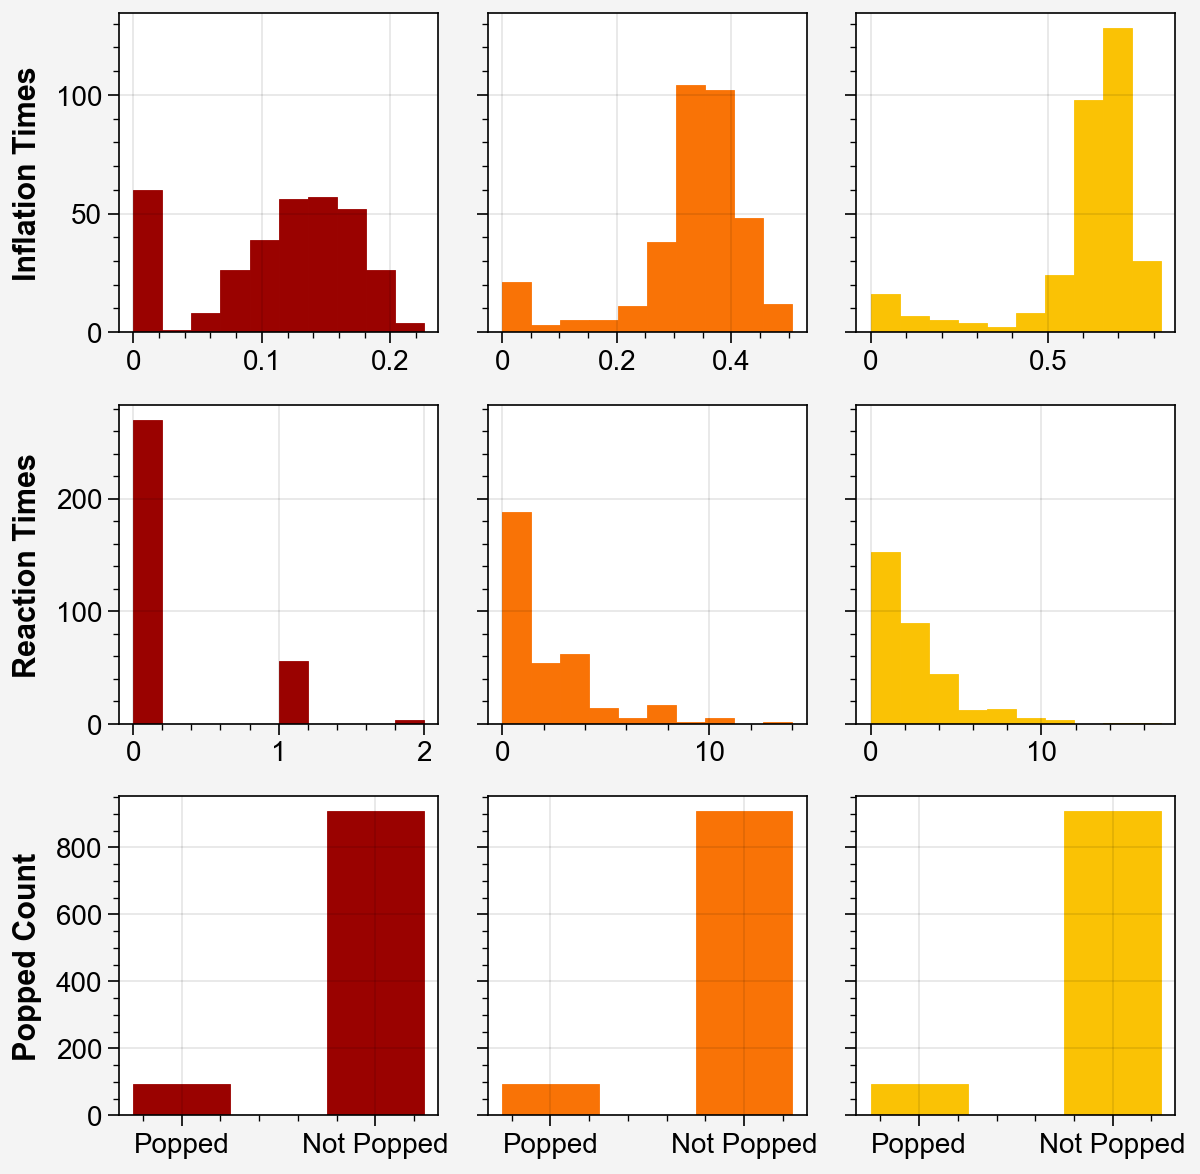

In [92]:
model, (obs_rms, ret_rms) = torch.load('../saved_checkpoints/behav/behav_t0/20.pt')
res = evalu(model, obs_rms, num_episodes=1000, deterministic=False)
plot_3color_it_rt(res, metrics=['size', 'rt', 'popped'])

SubplotGrid(nrows=2, ncols=3, length=6)

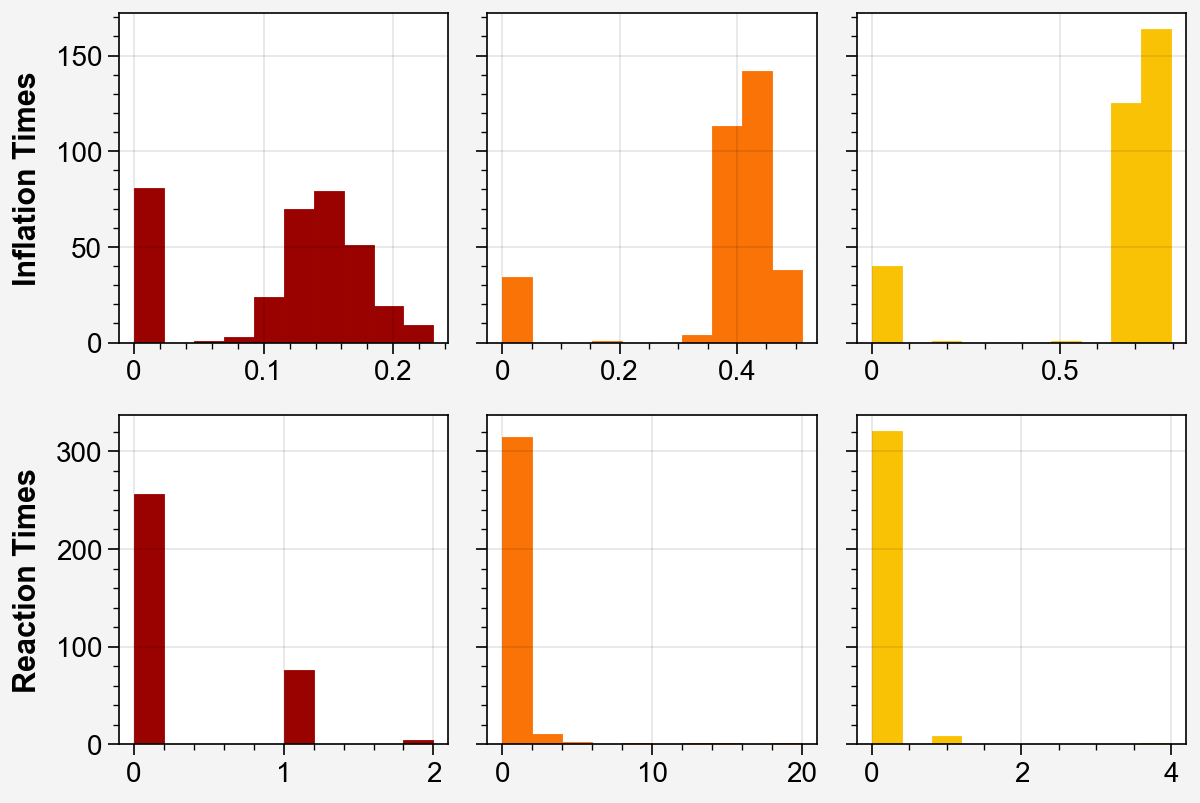

In [4]:
model, (obs_rms, ret_rms) = torch.load('../saved_checkpoints/behav/behav_t0/100.pt')
res = evalu(model, obs_rms, num_episodes=1000, deterministic=False)
plot_3color_it_rt(res)

SubplotGrid(nrows=3, ncols=3, length=9)

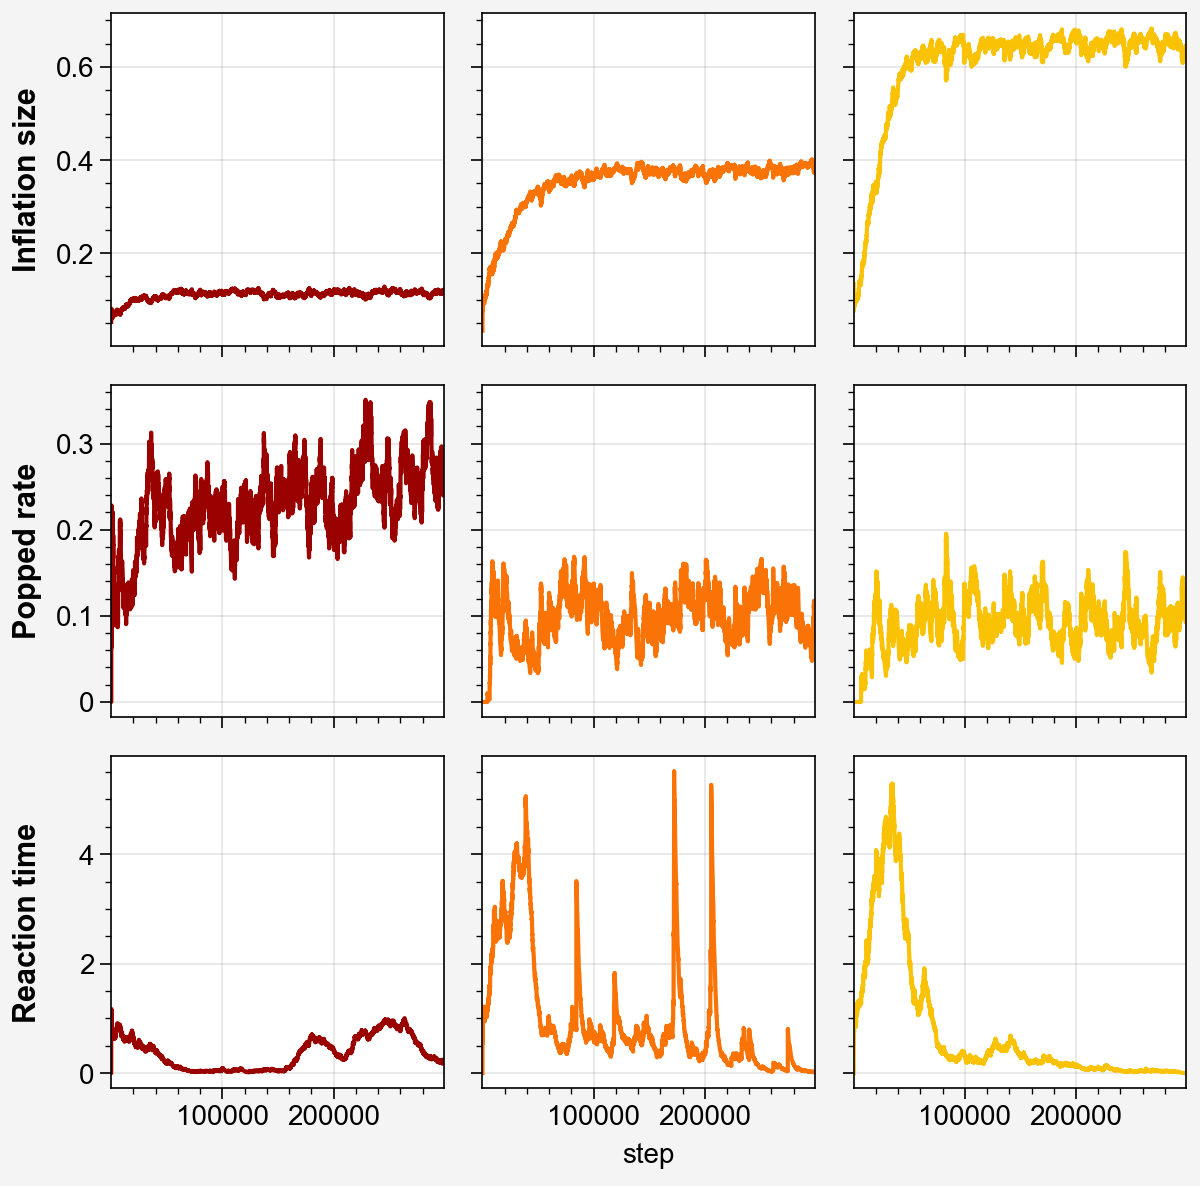

In [70]:
df = load_exp_df('behav/behav', trial_num=0)
plot_bart_behaviors(df, metrics=['size', 'popped', 'rt'])

In [95]:
fres = get_bart_res_eps(res, color=['red'], min_rt=2)
len(fres['obs'])

3

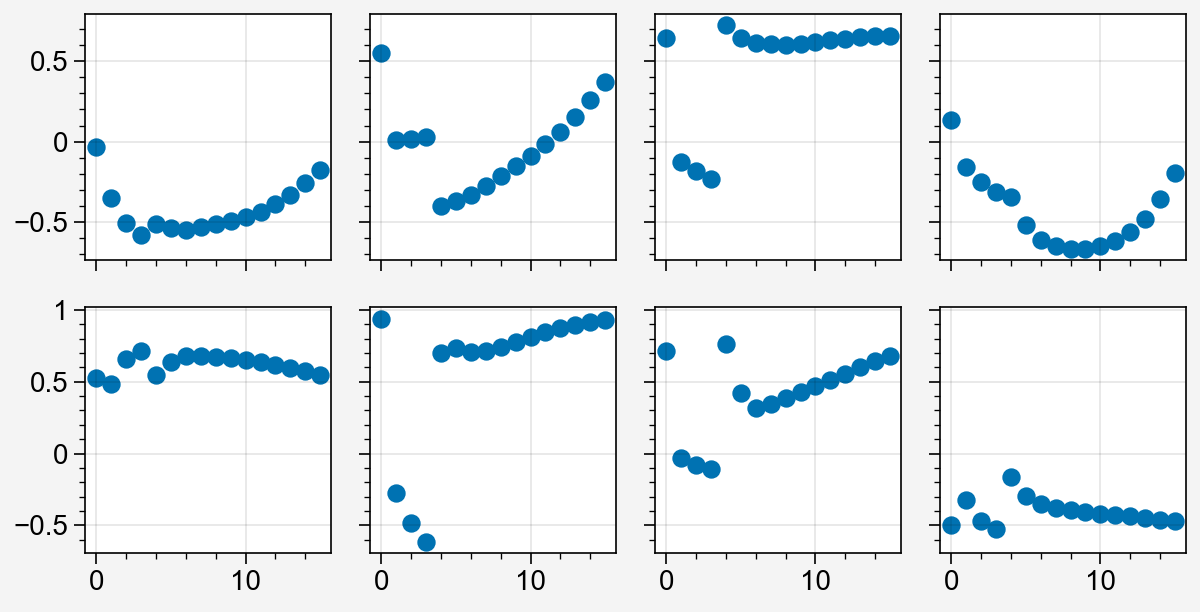

In [66]:
fig, ax = pplt.subplots(nrows=2, ncols=4, figwidth=6)
ep = 2
rnn_hxs = fres['rnn_hxs'][ep]
for i in range(8):
    ax[i].scatter(rnn_hxs[:, i])

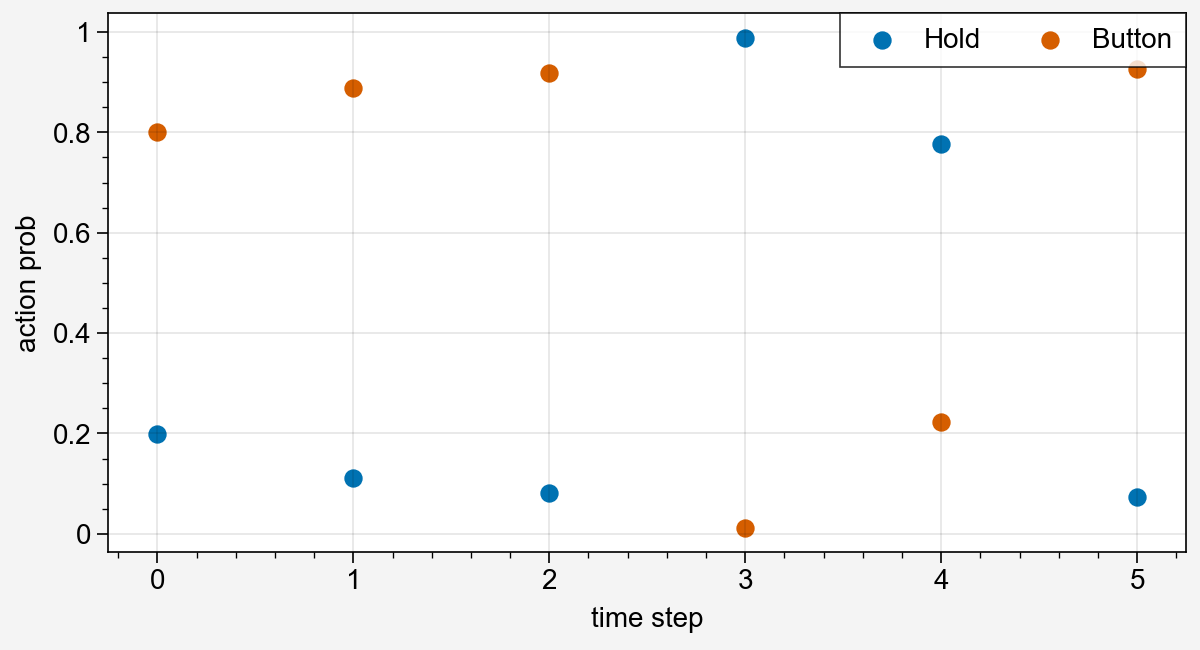

In [96]:
fig, ax = pplt.subplots(refaspect=2, figwidth=6)
ep = 0
aps = fres['action_probs'][ep]
labels = ['Hold', 'Button']
for i in range(2):
    ax.scatter(aps[:, i], label=labels[i])
ax.format(ylabel='action prob', xlabel='time step')
ax.legend()

# MetaBart

In [57]:
%run model_evaluation
%run bart_behavior_analysis

In [44]:
evalu = partial(evalu, data_callback=meta_bart_callback,
                env_name="BartMetaEnv", num_episodes=10)

In [45]:
model, (obs_rms, ret_rms) = torch.load('../saved_checkpoints/meta/meta_t0/200.pt')
res = evalu(model, obs_rms, deterministic=False)
plot_3color_it_rt(res, metrics=['size', 'rt', 'popped'])

KeyError: 'color'

SubplotGrid(nrows=3, ncols=3, length=9)

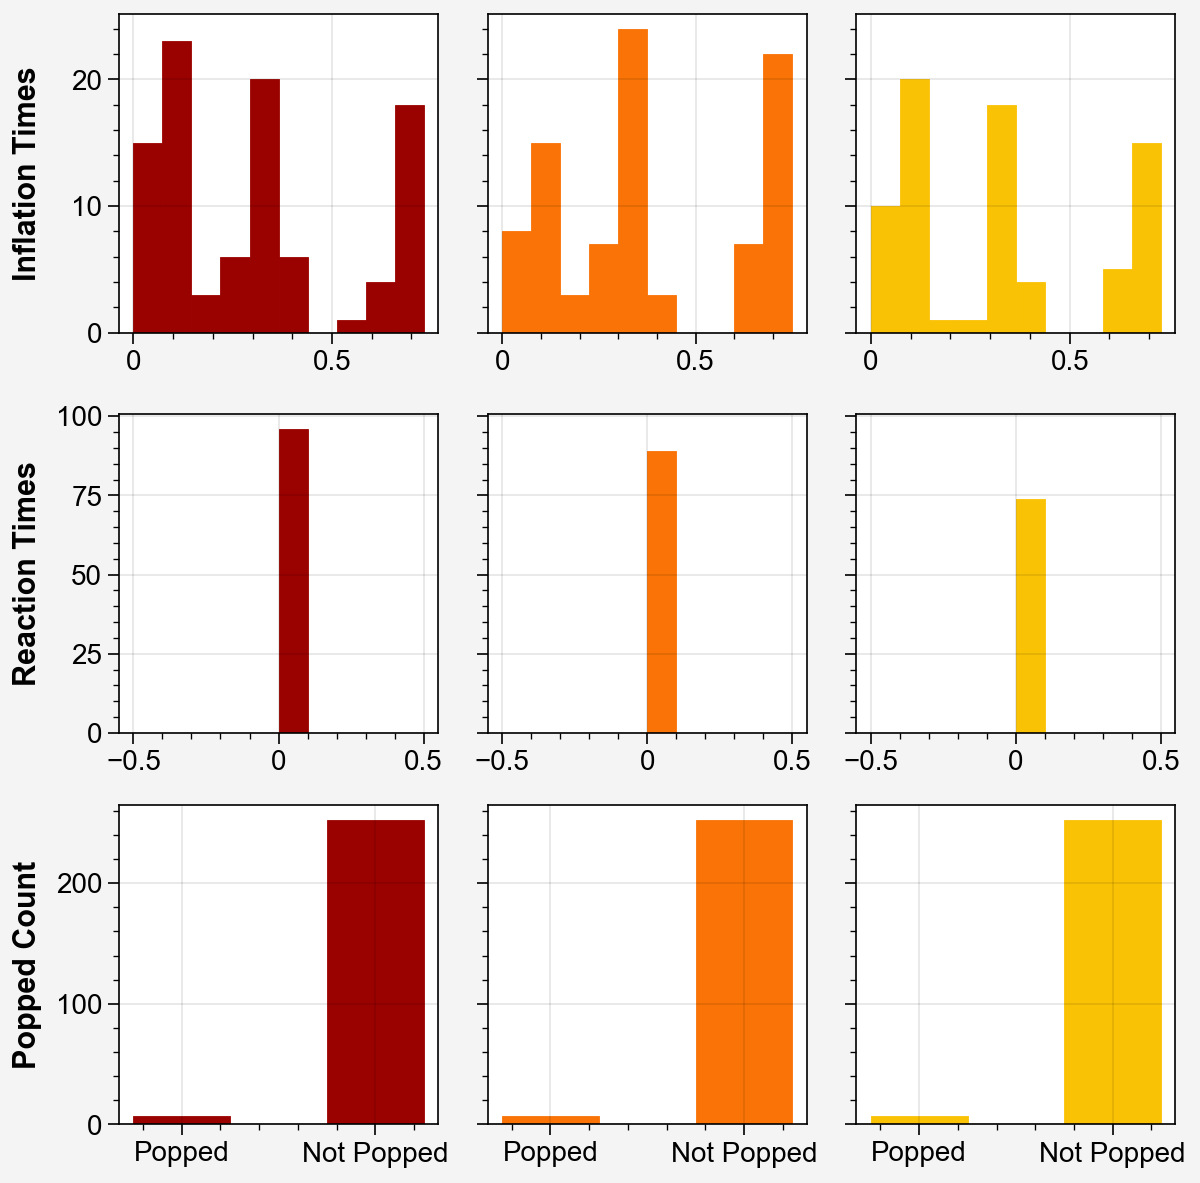

In [58]:
plot_3color_meta_ep(res, metrics=['size', 'rt', 'popped'])

In [29]:
env = make_vec_env('BartMetaEnv')

In [30]:
env.reset()

array([[0.        , 0.00707071, 0.        , 0.        , 0.        ,
        0.        , 0.00707071, 0.        ]], dtype=float32)

In [42]:
env.step(torch.tensor([1]))

(array([[-0.63242704,  1.1546813 , -0.63242704,  0.        ,  0.        ,
         -0.7995194 ,  0.86601454, -0.8659893 ]], dtype=float32),
 array([0.7319879], dtype=float32),
 array([False]),
 [{'current_color': 1,
   'last_size': 0.02625874120467079,
   'popped': False,
   'bart_finished': True,
   'inflate_delay': 0,
   'balloon_limit': 0.5063802954259373,
   'TimeLimit.truncated': False}])